In [4]:
!pip install torch torchvision torchaudio
!pip install easyocr
!pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/40/d9/c1784db9db0d484c8e5deeafbaac0d6ed66e165c6eb4a74fb43a5fa947d9/matplotlib-3.8.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/e5/76/94bc17eb868f8c7397f8fdfdeae7661c1b9a35f3a7219da308596e8c252a/contourpy-1.1.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/2b/b3/70c33027c4918c10ccf176014b38f8b91cb18ac018a78854543a4fc72609/cycler-0.12.0-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/55/a7/5936376afaeaca384c9604ac15311edd1a03a520b4f1eef31da2b42148f1/fonttools-4.43.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/155.0 kB ? eta -:--:--
     ------- ------------------------------- 30.7/155.0 kB 1.4 MB/s e

In [5]:
import easyocr as ea
import cv2
from matplotlib import pyplot as plt
import numpy as np


In [6]:
IMAGE_PATH = 'ur2.jpg'

In [7]:
reader = ea.Reader(['hi'])
result = reader.readtext(IMAGE_PATH)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[19, 23], [47, 23], [47, 37], [19, 37]], 'फ़ठा', 0.028092594867781755),
 ([[160, 22], [225, 22], [225, 40], [160, 40]], 'ज़टफ़ँ1', 0.002030132518555991),
 ([[19, 47], [51, 47], [51, 61], [19, 61]], '$ङौ[', 0.025684665888547897),
 ([[75, 45], [113, 45], [113, 61], [75, 61]], 'साबित', 0.6252828846844894),
 ([[123, 47], [145, 47], [145, 61], [123, 61]], '=.*', 0.08060506224360228),
 ([[159, 47], [221, 47], [221, 61], [159, 61]],
  'गटट @"',
  0.0013743492935664673),
 ([[19, 77], [55, 77], [55, 91], [19, 91]], 'म11', 0.01869170198458605),
 ([[75, 77], [109, 77], [109, 91], [75, 91]], 'सचात', 0.6774242097606437),
 ([[159, 75], [209, 75], [209, 91], [159, 91]],
  'डधशठ]ौध ,',
  0.0011137665433790336),
 ([[19, 105], [63, 105], [63, 119], [19, 119]], 'ड१ड़0फ़1', 0.00529065517966041),
 ([[77, 105], [105, 105], [105, 123], [77, 123]],
  'सुनूत',
  0.22777840554536885),
 ([[123, 103], [147, 103], [147, 119], [123, 119]], '=:', 0.7846682009173076),
 ([[158, 104], [195, 104], [195, 121], [158, 121]],

In [8]:
def is_hindi_text(text):
    # Define the Unicode range for Hindi characters (Devanagari script)
    hindi_script_range = range(0x0900, 0x097F + 1)
    return all(ord(char) in hindi_script_range for char in text)

IMAGE_PATH = 'ur2.jpg'
reader = ea.Reader(['hi'])
result = reader.readtext(IMAGE_PATH)
output_array = []
for item in result:
    text_to_print = item[1]
    if is_hindi_text(text_to_print):
        output_array.append(text_to_print)

res = ','.join(str(v) for v in output_array)
with open("output.txt", "a", encoding="utf-8") as f:
    print(res, file=f)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [9]:
top_left =tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result [0][1]
font =cv2.FONT_HERSHEY_SIMPLEX

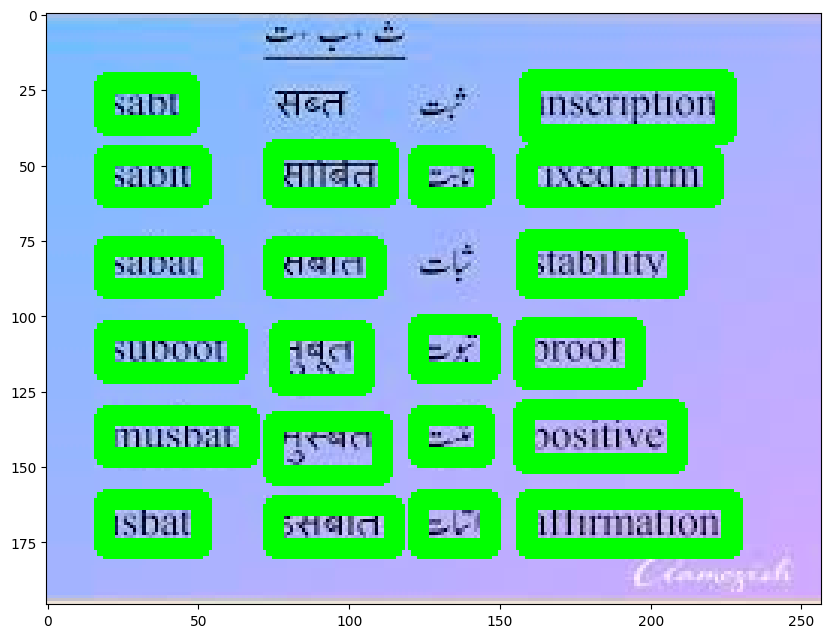

In [10]:
img = cv2.imread(IMAGE_PATH)
for detection in result:
    top_left =tuple([int(val) for val in detection[0][0]])
    bottom_right = tuple([int(val) for val in detection[0][2]])
    text = detection[1]
    font = cv2.FONT_HERSHEY_SIMPLEX
    font = cv2.rectangle(img,top_left,bottom_right,(0,255,0),5)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [12]:
import os
os.startfile('C:\Users\uaepe\OneDrive\Desktop\Hindi--OCR-And-Translation-main\\output.txt')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (355930092.py, line 2)

In [1]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117
!pip install transformers ipywidgets gradio --upgrade
!pip install sentencepiece

Looking in indexes: https://download.pytorch.org/whl/cu117


In [1]:
import gradio as gr  #ui library
from transformers import pipeline # tranform library

In [2]:
translation_pipeline = pipeline('translation_hi_to_en',model ='Helsinki-NLP/opus-mt-hi-en')

C:\Users\uaepe\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\models\marian\tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [3]:
results = translation_pipeline('बारिश')

In [4]:
results[0]['translation_text']

'Rain'

In [5]:
def translate_transformers(from_text):
    results = translation_pipeline(from_text)
    return results[0]['translation_text']

In [6]:
translate_transformers('बारिश')

'Rain'

In [7]:
import gradio as gr

interface = gr.Interface(fn=translate_transformers, 
                         inputs=gr.components.Textbox(lines=2, placeholder='Text to translate'),
                         outputs='text')


In [8]:
interface.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [9]:
!pip install torch torchvision torchaudio
!pip install easyocr

import easyocr as ea
import cv2
from matplotlib import pyplot as plt

def is_hindi_text(text):
    # Define the Unicode range for Hindi characters (Devanagari script)
    hindi_script_range = range(0x0900, 0x097F + 1)
    return all(ord(char) in hindi_script_range for char in text)

IMAGE_PATH = 'ur2.jpg'
reader = ea.Reader(['hi'])
result = reader.readtext(IMAGE_PATH)

output_array = []
for item in result:
    text_to_print = item[1]
    if is_hindi_text(text_to_print):
        output_array.append(text_to_print)

res = ','.join(str(v) for v in output_array)
with open("output.txt", "a", encoding="utf-8") as f:
    print(res, file=f)

img = cv2.imread(IMAGE_PATH)
for detection in result:
    text = detection[1]
    if is_hindi_text(text):
        top_left = tuple([int(val) for val in detection[0][0]])
        bottom_right = tuple([int(val) for val in detection[0][2]])
        font = cv2.FONT_HERSHEY_SIMPLEX
        font = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 5)

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.show()

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


<Figure size 1000x1000 with 1 Axes>